In [12]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


In [23]:
np.random.seed(2)
data = {
    'age': np.random.randint(22, 65, 30),  # Adjusted age range
    'employment_status': np.random.choice(['Employed', 'Unemployed', 'Self-Employed'], size=30),
    'open_credit_lines': np.random.randint(1, 15, 30),  # Adjusted number of open credit lines
    'monthly_income': np.random.randint(3000, 12000, 30),  # Adjusted monthly income
    'credit_score': np.random.randint(500, 850, 30),  # Adjusted credit score range
}

# Introduce correlation between credit score and eligibility
data['credit_card_eligibility'] = np.where(data['credit_score'] > 650, 'Yes', 'No')

# Generate random product views based on common categories
products = ['Laptop', 'Mouse', 'Keyboard', 'Screen_Guard', 'Charger', 'Laptop_Case', 'Shirt', 'Trousers',
            'Shoe', 'Socks', 'Phone', 'Phone_Case', 'Desk', 'Chair', 'Notepad', 'Pen', 'Coffee_Mug', 'Backpack', 
            'Fitness_Band', 'Headphones', 'Water_Bottle', 'Sunglasses', 'Watch', 'Wallet', 'Hat', 'Jacket', 
            'Gaming_Console', 'Gaming_Controller', 'Gaming_Headset', 'Camera', 'Tripod', 'Printer', 'Scanner', 
            'External_Hard_Drive', 'USB_Flash_Drive', 'Bluetooth_Speaker', 'Smartwatch', 'Tablet', 'Cable_Organizer', 
            'Portable_Charger', 'Travel_Pillow', 'Luggage', 'Sunscreen', 'Hiking_Boots', 'Tent', 'Sleeping_Bag', 
            'Dumbbells', 'Yoga_Mat', 'Resistance_Bands', 'Protein_Powder', 'Blender', 'Cookware_Set', 'Food_Processor', 
            'Air_Fryer', 'Coffee_Maker', 'Toaster', 'Blender', 'Juicer', 'Vacuum_Cleaner', 'Robot_Vacuum', 'Air_Purifier', 
            'Humidifier', 'Smart_Thermostat', 'Security_Camera', 'Video_Doorbell', 'Smart_Lock', 'Wireless_Router', 
            'Gaming_Chair', 'Bean_Bag', 'Wall_Art', 'Plant_Pot', 'Mirror', 'Candle_Holder', 'Rug', 'Pillow', 'Blanket', 
            'Curtains', 'Board_Game', 'Chess_Set', 'Puzzle', 'Foosball_Table', 'Ping_Pong_Table', 'Guitar', 'Keyboard', 
            'Microphone', 'Drone', 'Binoculars', 'Telescope', 'Bicycle', 'Helmet', 'Camping_Stove', 'Sleeping_Pad', 
            'Hammock', 'Fishing_Rod', 'Tent', 'Canoe', 'Kayak', 'Snowboard', 'Ski_Poles', 'Snowshoes', 'Ice_Skates']

data['products_viewed'] = [' '.join(np.random.choice(products, size=np.random.randint(2, 4))) for _ in range(30)]

# Create DataFrame with 'user_id' as the index
df = pd.DataFrame(data)

In [24]:
df.head()

,age,employment_status,open_credit_lines,monthly_income,credit_score,credit_card_eligibility,products_viewed
0,62,Unemployed,4,3609,610,No,Phone_Case Mouse
1,37,Self-Employed,1,11082,550,No,Wall_Art Robot_Vacuum Security_Camera
2,30,Employed,12,11148,701,Yes,Foosball_Table Hammock Puzzle
3,44,Employed,1,8594,635,No,Backpack Tablet
4,40,Self-Employed,11,5903,749,Yes,Printer USB_Flash_Drive Foosball_Table


In [25]:
df['employment_status'].value_counts()

employment_status
Self-Employed    12
Unemployed       10
Employed          8
Name: count, dtype: int64

D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

<Figure size 1000x600 with 0 Axes>

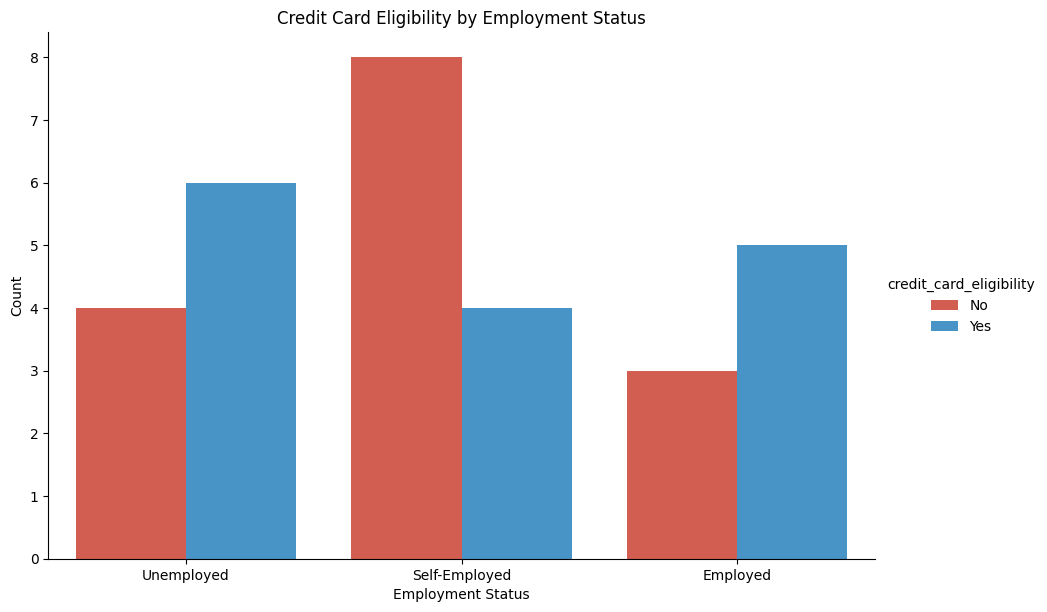

In [26]:
custom_palette = {'Yes': '#3498db', 'No': '#e74c3c'}

# Create a catplot
plt.figure(figsize=(10, 6))  # Adjust the figure size
plot = sns.catplot(data=df, x='employment_status', kind='count', hue='credit_card_eligibility', palette=custom_palette, height=6, aspect=1.5)

# Customize labels and title
plot.set(xlabel='Employment Status', ylabel='Count', title='Credit Card Eligibility by Employment Status')

# Display the plot
plt.show()

D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

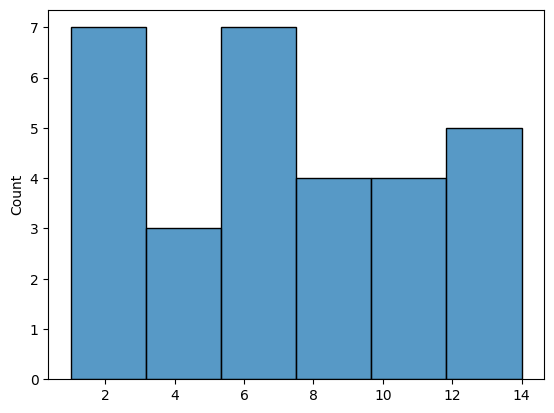

In [27]:
sns.histplot(data['open_credit_lines'])

In [40]:
import numpy as np
import pandas as pd

# Seed for reproducibility
np.random.seed(1)

# Generate modified data
data = {
    'age': np.random.randint(22, 65, 30),
    'employment_status': np.random.choice(['Employed', 'Unemployed', 'Self-Employed'], size=30,
                                          p=[0.7, 0.2, 0.1]),
    'open_credit_lines': np.random.randint(1, 15, 30),
    'monthly_income': np.random.randint(2500, 12000, 30),
    'credit_score': np.random.randint(550, 800, 30),
}

# Adjusted credit card eligibility criteria
data['eligibility'] = np.where(
    (data['employment_status'] == 'Employed') & (data['credit_score'] > 600) & (data['open_credit_lines'] > 3),
    'Yes', 'No'
)

products = ['Laptop', 'Mouse', 'Keyboard', 'Screen_Guard', 'Charger', 'Laptop_Case', 'Shirt', 'Trousers',
            'Shoe', 'Socks', 'Phone', 'Phone_Case', 'Desk', 'Chair', 'Notepad', 'Pen', 'Coffee_Mug', 'Backpack', 
            'Fitness_Band', 'Headphones', 'Water_Bottle', 'Sunglasses', 'Watch', 'Wallet', 'Hat', 'Jacket', 
            'Gaming_Console', 'Gaming_Controller', 'Gaming_Headset', 'Camera', 'Tripod', 'Printer', 'Scanner', 
            'External_Hard_Drive', 'USB_Flash_Drive', 'Bluetooth_Speaker', 'Smartwatch', 'Tablet', 'Cable_Organizer', 
            'Portable_Charger', 'Travel_Pillow', 'Luggage', 'Sunscreen', 'Hiking_Boots', 'Tent', 'Sleeping_Bag', 
            'Dumbbells', 'Yoga_Mat', 'Resistance_Bands', 'Protein_Powder', 'Blender', 'Cookware_Set', 'Food_Processor', 
            'Air_Fryer', 'Coffee_Maker', 'Toaster', 'Blender', 'Juicer', 'Vacuum_Cleaner', 'Robot_Vacuum', 'Air_Purifier', 
            'Humidifier', 'Smart_Thermostat', 'Security_Camera', 'Video_Doorbell', 'Smart_Lock', 'Wireless_Router', 
            'Gaming_Chair', 'Bean_Bag', 'Wall_Art', 'Plant_Pot', 'Mirror', 'Candle_Holder', 'Rug', 'Pillow', 'Blanket', 
            'Curtains', 'Board_Game', 'Chess_Set', 'Puzzle', 'Foosball_Table', 'Ping_Pong_Table', 'Guitar', 'Keyboard', 
            'Microphone', 'Drone', 'Binoculars', 'Telescope', 'Bicycle', 'Helmet', 'Camping_Stove', 'Sleeping_Pad', 
            'Hammock', 'Fishing_Rod', 'Tent', 'Canoe', 'Kayak', 'Snowboard', 'Ski_Poles', 'Snowshoes', 'Ice_Skates']

data['products_viewed'] = [','.join(np.random.choice(products, size=np.random.randint(3, 25))) for _ in range(30)]

# Create DataFrame with 'user_id' as the index
df1 = pd.DataFrame(data)

# Save the modified dataset to Excel
df1.to_csv('ML_EXAM2_2.csv')


In [41]:
df1.head()

,age,employment_status,open_credit_lines,monthly_income,credit_score,eligibility,products_viewed
0,59,Unemployed,6,3978,744,No,"Jacket,Notepad,Chair,Microphone,Hiking_Boots,S..."
1,34,Self-Employed,10,6559,621,No,"Yoga_Mat,Board_Game,Travel_Pillow,Chess_Set,Sl..."
2,30,Employed,4,3215,781,Yes,"Keyboard,Microphone,Keyboard,Resistance_Bands"
3,31,Employed,7,8907,726,Yes,"Gaming_Headset,Toaster,Guitar"
4,33,Unemployed,9,8721,604,No,"Shoe,Snowshoes,Scanner,Shoe,Microphone,Board_G..."


D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

<Figure size 1000x600 with 0 Axes>

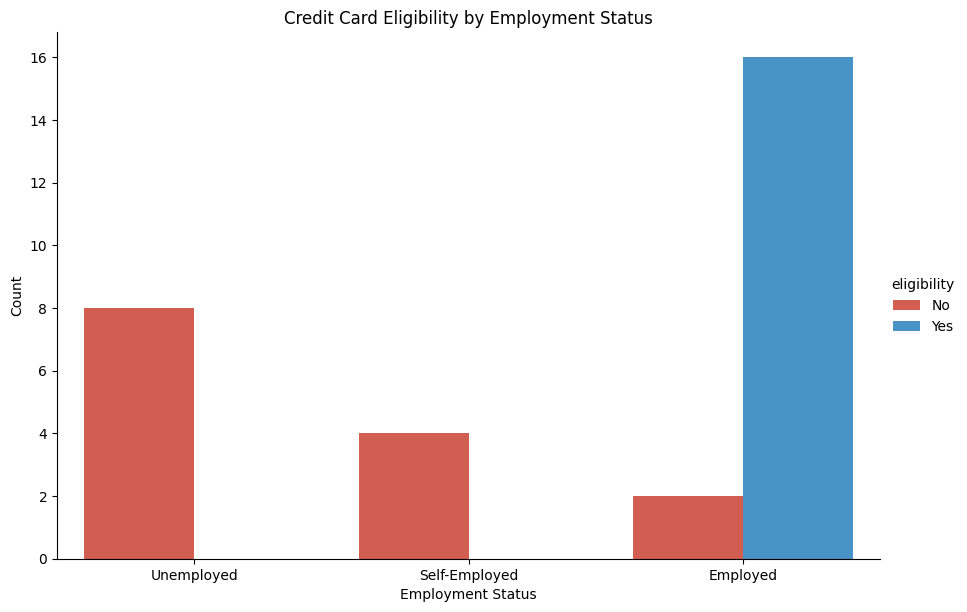

In [35]:
custom_palette = {'Yes': '#3498db', 'No': '#e74c3c'}

# Create a catplot
plt.figure(figsize=(10, 6))  # Adjust the figure size
plot = sns.catplot(data=df1, x='employment_status', kind='count', hue='eligibility', palette=custom_palette, height=6, aspect=1.5)

# Customize labels and title
plot.set(xlabel='Employment Status', ylabel='Count', title='Credit Card Eligibility by Employment Status')

# Display the plot
plt.show()

D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

<Axes: xlabel='credit_score', ylabel='monthly_income'>

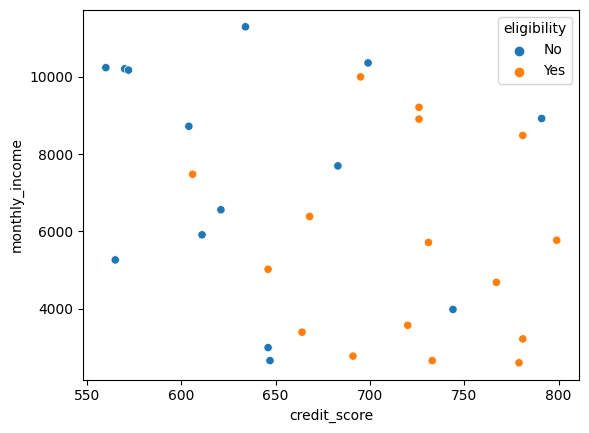

In [36]:
sns.scatterplot(x = 'credit_score', y = 'monthly_income', data = df1, hue = 'eligibility')

D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

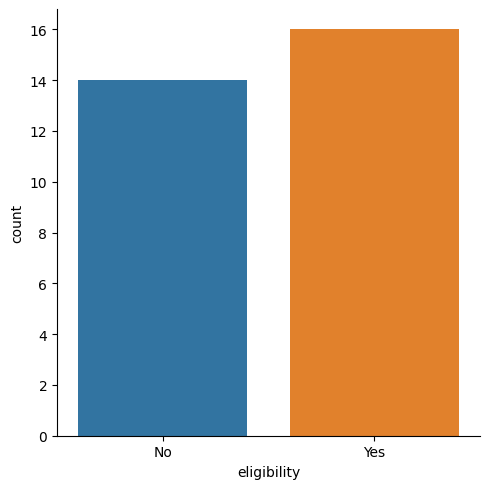

In [37]:
sns.catplot(data = df1, x = 'eligibility', kind = 'count')